https://www.kaggle.com/code/hasibalmuzdadid/lung-cancer-analysis-accuracy-96-4/notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("survey lung cancer.csv")

In [4]:
print(f"Shape of The Dataset : {data.shape}")

data.head()

Shape of The Dataset : (309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [7]:
#O resultado (Cancer / nao cancer) é um objeto, para incluir ele fazemos:
data.describe(include=object)

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


In [8]:
#Nao temos dados nulos
data.isna().sum().to_frame().T

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
#Para melhor visualização vou substituir os valores int64 para valores binarios (sim / nao)
data_temp = data.copy()
data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Masc" , "F" : "Fem"})

for column in data_temp.columns:
    data_temp[column] = data_temp[column].replace({2: "Sim" , 1 : "Nao"})

data_temp["LUNG_CANCER"] = data_temp["LUNG_CANCER"].replace({"YES": "Sim", "NO": "Nao"})

data_temp.head()  

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Masc,69,Nao,Sim,Sim,Nao,Nao,Sim,Nao,Sim,Sim,Sim,Sim,Sim,Sim,Sim
1,Masc,74,Sim,Nao,Nao,Nao,Sim,Sim,Sim,Nao,Nao,Nao,Sim,Sim,Sim,Sim
2,Fem,59,Nao,Nao,Nao,Sim,Nao,Sim,Nao,Sim,Nao,Sim,Sim,Nao,Sim,Nao
3,Masc,63,Sim,Sim,Sim,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Sim,Sim,Nao
4,Fem,63,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Sim,Sim,Nao,Nao,Nao


In [11]:
# Observar o pq de uma pessoa ter cancer
data_posit = data_temp[data_temp['LUNG_CANCER'] == "Sim"]
data_posit.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Masc,69,Nao,Sim,Sim,Nao,Nao,Sim,Nao,Sim,Sim,Sim,Sim,Sim,Sim,Sim
1,Masc,74,Sim,Nao,Nao,Nao,Sim,Sim,Sim,Nao,Nao,Nao,Sim,Sim,Sim,Sim
5,Fem,75,Nao,Sim,Nao,Nao,Sim,Sim,Sim,Sim,Nao,Sim,Sim,Nao,Nao,Sim
6,Masc,52,Sim,Nao,Nao,Nao,Nao,Sim,Nao,Sim,Sim,Sim,Sim,Nao,Sim,Sim
7,Fem,51,Sim,Sim,Sim,Sim,Nao,Sim,Sim,Nao,Nao,Nao,Sim,Sim,Nao,Sim


In [20]:
# Observar o pq de uma pessoa ter cancer
data_neg = data_temp[data_temp['LUNG_CANCER'] == "Nao"]
data_neg.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
2,Fem,59,Nao,Nao,Nao,Sim,Nao,Sim,Nao,Sim,Nao,Sim,Sim,Nao,Sim,Nao
3,Masc,63,Sim,Sim,Sim,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Sim,Sim,Nao
4,Fem,63,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Sim,Sim,Nao,Nao,Nao
8,Fem,68,Sim,Nao,Sim,Nao,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao
12,Fem,60,Sim,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Nao


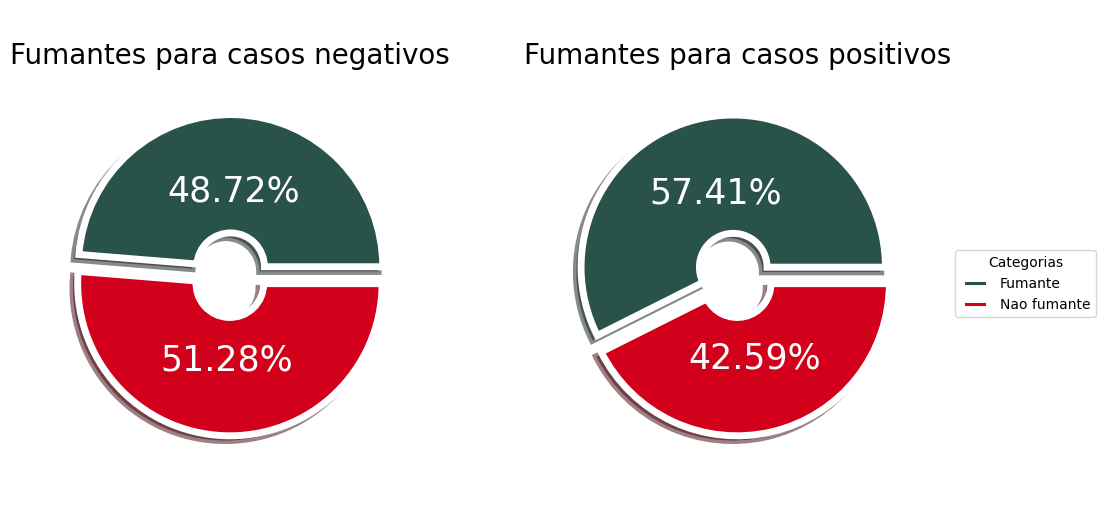

In [69]:
plt.subplots(figsize=(12, 12))

labels = "Fumante","Nao fumante"
size = 0.7


plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie([len(data_neg[data_neg["SMOKING"]=="Sim"]["SMOKING"]),
                                    len(data_neg[data_neg["SMOKING"]=="Nao"]["SMOKING"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#29524A","#D2001A"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

#plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
#plt.title("\nDistribuição de casos positivos entre fumantes e não fumantes para casos negativos",fontsize=20, color = "white")
plt.title("\nFumantes para casos negativos",fontsize=20, color = "black")

plt.subplot(1, 2, 2)

wedges1, texts1, autotexts1 = plt.pie([len(data_posit[data_posit["SMOKING"]=="Sim"]["SMOKING"]),
                                    len(data_posit[data_posit["SMOKING"]=="Nao"]["SMOKING"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#29524A","#D2001A"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges1, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nFumantes para casos positivos",fontsize=20, color = "black")

plt.show()
#Como esperado, pessoas fumantes tem a tendencia de apresentar cancer no pulmao

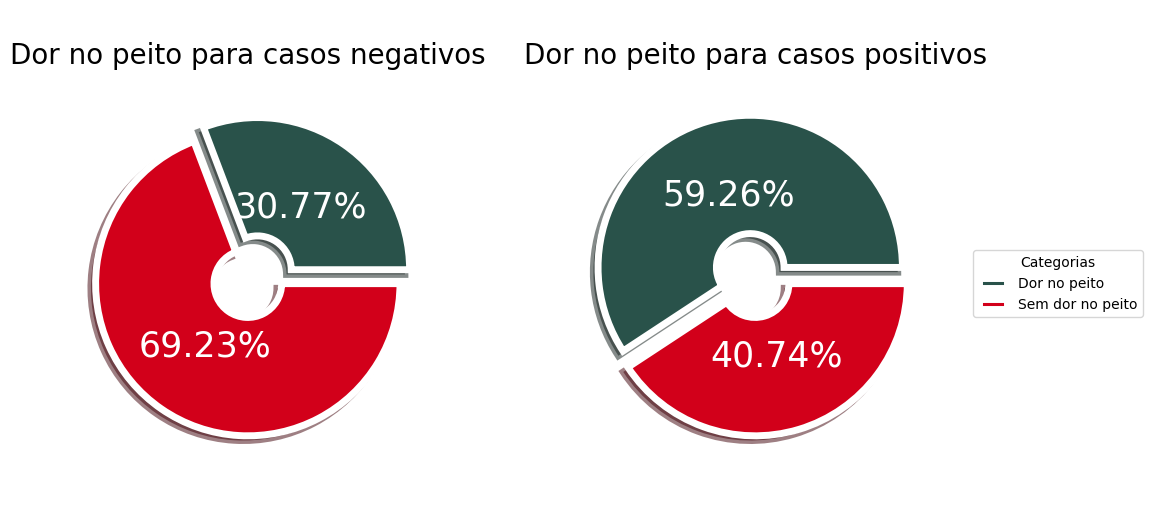

In [47]:
# Vamos tentar achar dados correlacionados
plt.subplots(figsize=(12, 12))

labels = "Dor no peito","Sem dor no peito"
size = 0.7

plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie([len(data_neg[data_neg["CHEST PAIN"]=="Sim"]["CHEST PAIN"]),
                                    len(data_neg[data_neg["CHEST PAIN"]=="Nao"]["CHEST PAIN"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#29524A","#D2001A"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

#plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
#plt.title("\nDistribuição de casos positivos entre fumantes e não fumantes para casos negativos",fontsize=20, color = "white")
plt.title("\nDor no peito para casos negativos",fontsize=20, color = "black")

plt.subplot(1, 2, 2)
wedges, texts, autotexts = plt.pie([len(data_posit[data_posit["CHEST PAIN"]=="Sim"]["CHEST PAIN"]),
                                    len(data_posit[data_posit["CHEST PAIN"]=="Nao"]["CHEST PAIN"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#29524A","#D2001A"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nDor no peito para casos positivos",fontsize=20, color = "black")
plt.show()
#Como esperado, pessoas fumantes tem a tendencia de apresentar cancer no pulmao

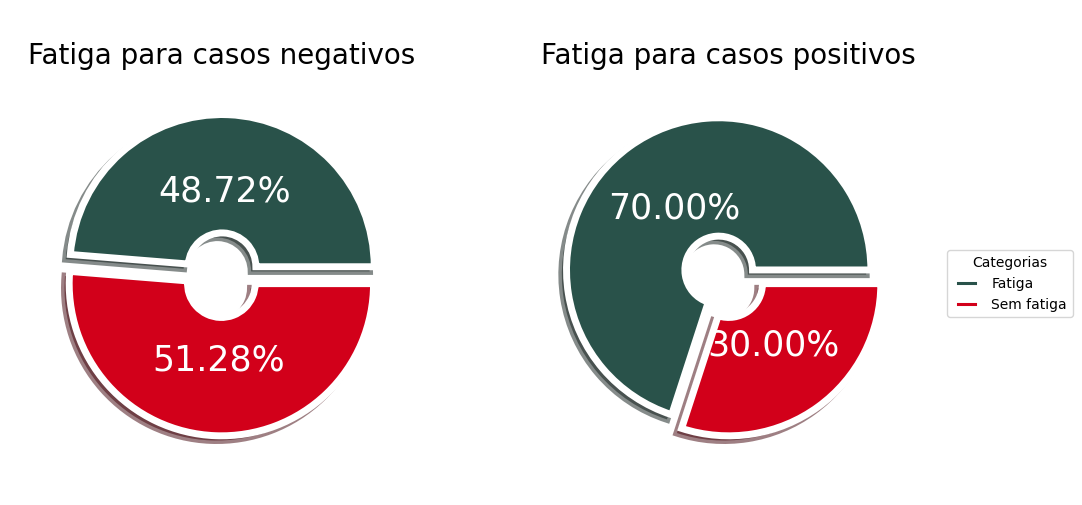

In [50]:
# Vamos tentar achar dados correlacionados
plt.subplots(figsize=(12, 12))

labels = "Fatiga","Sem fatiga"
size = 0.7

plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie([len(data_neg[data_neg["FATIGUE "]=="Sim"]["FATIGUE "]),
                                    len(data_neg[data_neg["FATIGUE "]=="Nao"]["FATIGUE "])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#29524A","#D2001A"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

#plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
#plt.title("\nDistribuição de casos positivos entre fumantes e não fumantes para casos negativos",fontsize=20, color = "white")
plt.title("\nFatiga para casos negativos",fontsize=20, color = "black")


plt.subplot(1, 2, 2)
wedges, texts, autotexts = plt.pie([len(data_posit[data_posit["FATIGUE "]=="Sim"]["FATIGUE "]),
                                    len(data_posit[data_posit["FATIGUE "]=="Nao"]["FATIGUE "])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#29524A","#D2001A"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nFatiga para casos positivos",fontsize=20, color = "black")
plt.show()
#Como esperado, pessoas fumantes tem a tendencia de apresentar cancer no pulmao

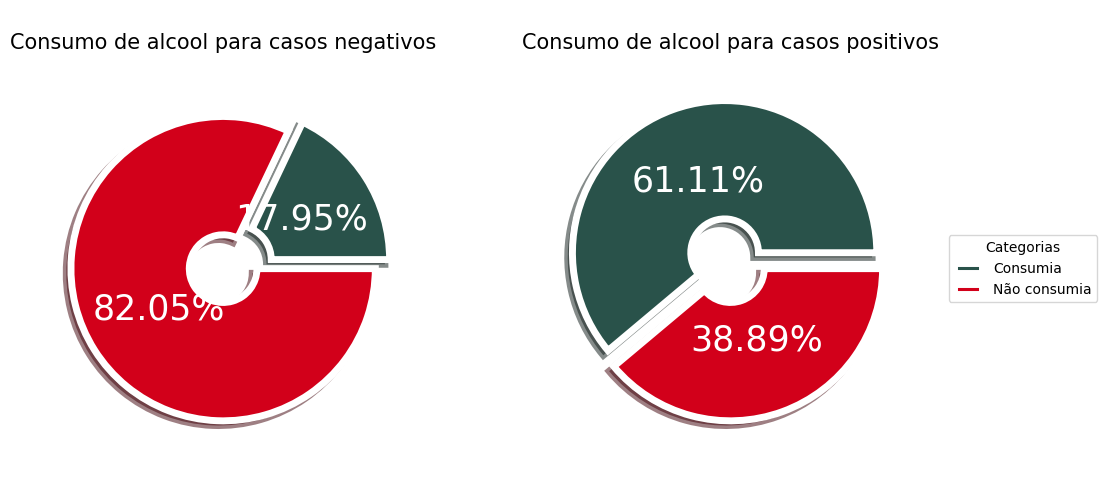

In [53]:
# Vamos tentar achar dados correlacionados
plt.subplots(figsize=(12, 12))

labels = "Consumia","Não consumia"
size = 0.7

plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie([len(data_neg[data_neg["ALCOHOL CONSUMING"]=="Sim"]["ALCOHOL CONSUMING"]),
                                    len(data_neg[data_neg["ALCOHOL CONSUMING"]=="Nao"]["ALCOHOL CONSUMING"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#29524A","#D2001A"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

#plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
#plt.title("\nDistribuição de casos positivos entre fumantes e não fumantes para casos negativos",fontsize=20, color = "white")
plt.title("\nConsumo de alcool para casos negativos",fontsize=15, color = "black")


plt.subplot(1, 2, 2)
wedges, texts, autotexts = plt.pie([len(data_posit[data_posit["ALCOHOL CONSUMING"]=="Sim"]["ALCOHOL CONSUMING"]),
                                    len(data_posit[data_posit["ALCOHOL CONSUMING"]=="Nao"]["ALCOHOL CONSUMING"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#29524A","#D2001A"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nConsumo de alcool para casos positivos",fontsize=15, color = "black")
plt.show()
#Como esperado, pessoas fumantes tem a tendencia de apresentar cancer no pulmao

In [61]:
#Para melhor visualização vou substituir os valores int64 para valores binarios (sim / nao)
data_outEnc = data.copy()
data_outEnc["GENDER"] = data_outEnc["GENDER"].replace({"M" : "Masc" , "F" : "Fem"})

for column in data_outEnc.columns:
    data_outEnc[column] = data_outEnc[column].replace({2: "Sim" , 1 : "Nao"})

data_outEnc["LUNG_CANCER"] = data_outEnc["LUNG_CANCER"].replace({"YES": "Sim", "NO": "Nao"})

data_outEnc.head()  

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Masc,69,Nao,Sim,Sim,Nao,Nao,Sim,Nao,Sim,Sim,Sim,Sim,Sim,Sim,Sim
1,Masc,74,Sim,Nao,Nao,Nao,Sim,Sim,Sim,Nao,Nao,Nao,Sim,Sim,Sim,Sim
2,Fem,59,Nao,Nao,Nao,Sim,Nao,Sim,Nao,Sim,Nao,Sim,Sim,Nao,Sim,Nao
3,Masc,63,Sim,Sim,Sim,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Sim,Sim,Nao
4,Fem,63,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Sim,Sim,Nao,Nao,Nao


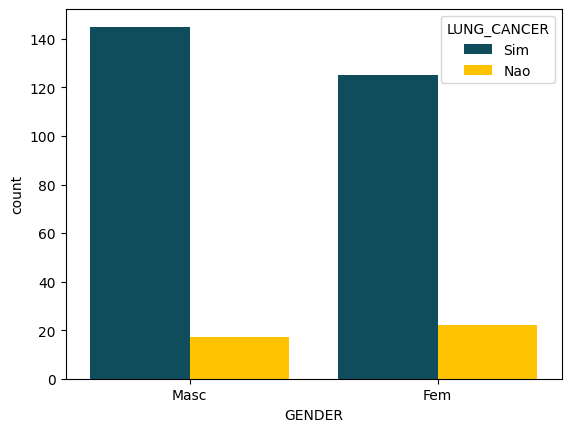

In [62]:
sns.countplot(data=data_outEnc,x="GENDER",hue="LUNG_CANCER",hue_order=["Sim","Nao"],palette=["#0f4c5c","#FFC300"],saturation=1)
plt.show()

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

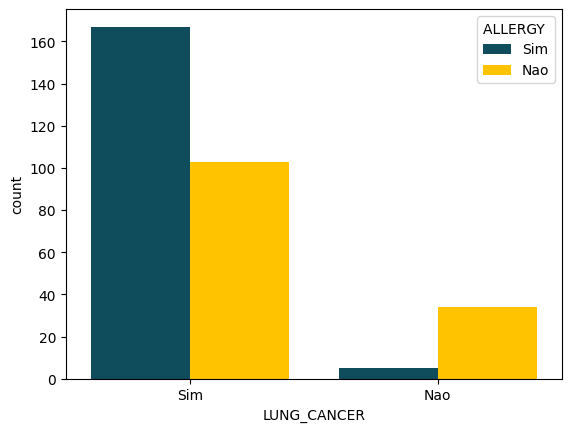

In [68]:
#sns.histplot(data = data_outEnc, x = "LUNG_CANCER" ,y = "ALLERGY")
sns.countplot(data=data_outEnc,x="LUNG_CANCER",hue="ALLERGY ",hue_order=["Sim","Nao"],palette=["#0f4c5c","#FFC300"],saturation=1)

<AxesSubplot:xlabel='ALCOHOL CONSUMING', ylabel='Percent'>

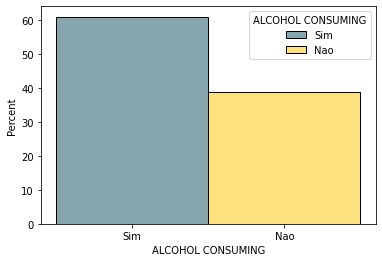

In [53]:
sns.histplot(data=data_posit, x="ALCOHOL CONSUMING", hue="ALCOHOL CONSUMING",hue_order=["Sim","Nao"],palette=["#0f4c5c","#FFC300"], stat='percent')

In [72]:
import sklearn

In [73]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

data["LUNG_CANCER"] = LabelEncoder.fit_transform(data["LUNG_CANCER"])

data = pd.get_dummies(data, columns= ["GENDER"])

data.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0


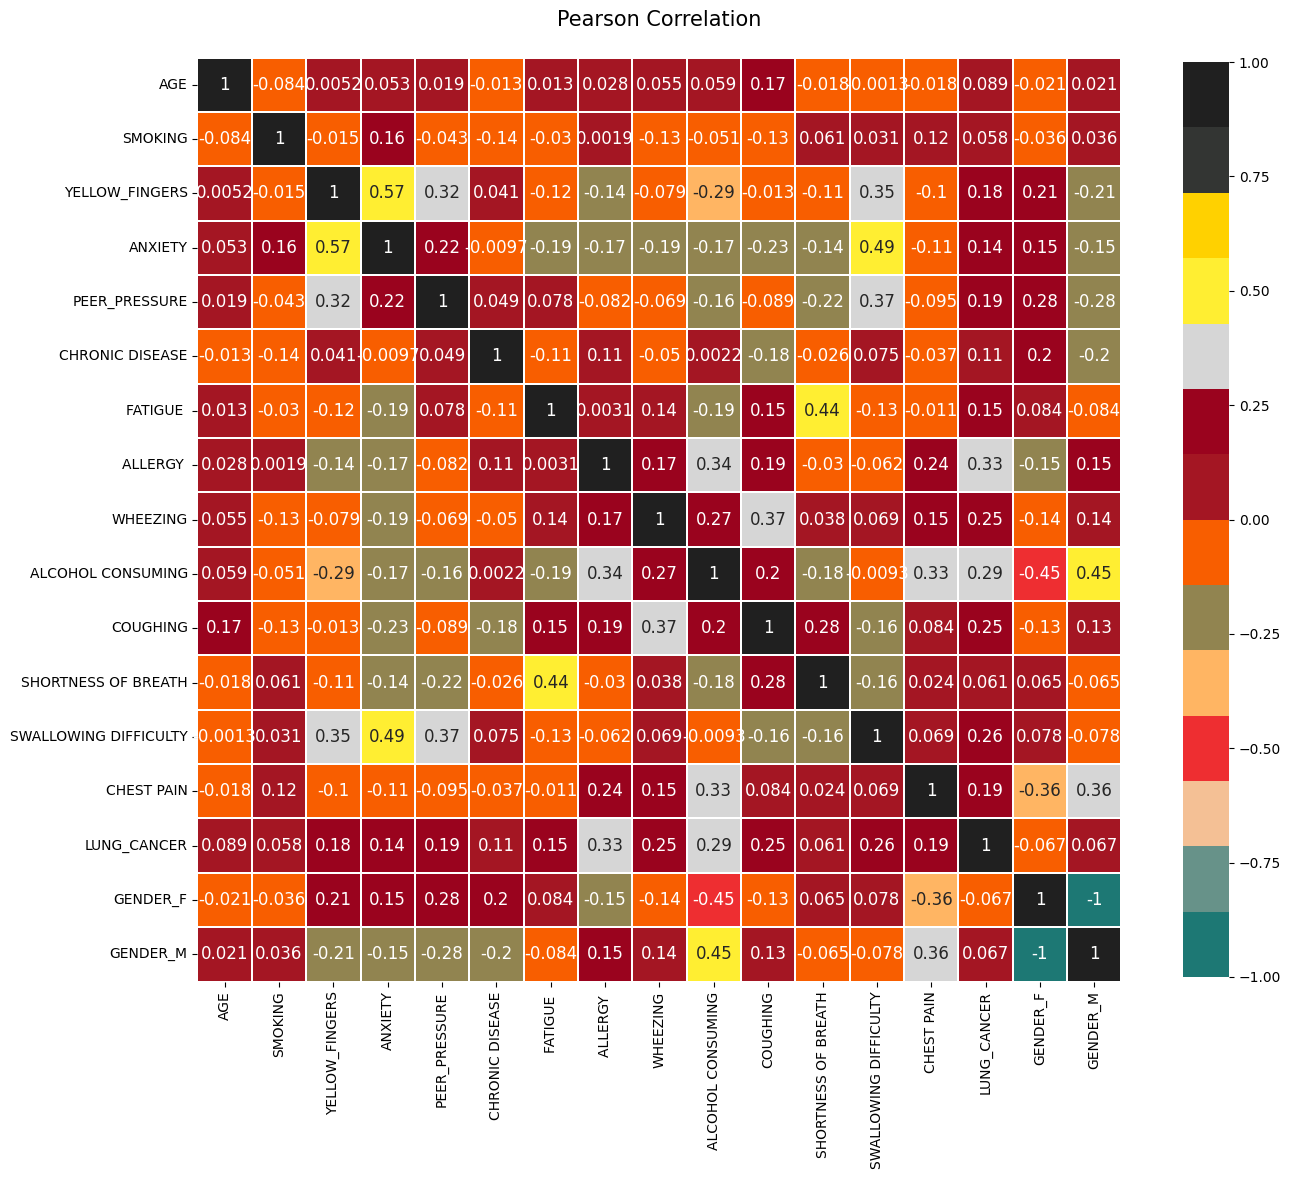

In [74]:
plt.subplots(figsize =(16, 12))

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

sns.heatmap(data.corr(), cmap = palette, square=True, cbar_kws=dict(shrink =.99), 
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation\n", size=15)
plt.xticks(rotation=90)
plt.show()

In [76]:
#Todos os dados
x = data.drop("LUNG_CANCER", axis = 1)
y = data["LUNG_CANCER"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (247, 16), (247,)
Shape of testing data : (62, 16), (62,)


In [82]:
#Para melhor visualização vou substituir os valores int64 para valores binarios (sim / nao)
data_esc = data.copy()

data_esc["LUNG_CANCER"] = LabelEncoder.fit_transform(data_esc["LUNG_CANCER"])
data_esc = data_esc.drop(["AGE","SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE", "CHRONIC DISEASE", "WHEEZING", "COUGHING", "SHORTNESS OF BREATH","SWALLOWING DIFFICULTY", "GENDER_F", "GENDER_M"], axis = 1)

data_esc.head()  

,FATIGUE,ALLERGY,ALCOHOL CONSUMING,CHEST PAIN,LUNG_CANCER
0,2,1,2,2,1
1,2,2,1,2,1
2,2,1,1,2,0
3,1,1,2,2,0
4,1,1,1,1,0


In [83]:
x1 = data_esc.drop("LUNG_CANCER", axis = 1)
y1 = data_esc["LUNG_CANCER"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x1 = scaler.fit_transform(x1)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train1.shape}, {y_train1.shape}")
print(f"Shape of testing data : {x_test1.shape}, {y_test1.shape}")

Shape of training data : (247, 4), (247,)
Shape of testing data : (62, 4), (62,)


In [84]:
import tensorflow

2022-09-12 11:36:24.660241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-12 11:36:24.803266: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-12 11:36:24.803289: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-12 11:36:24.825846: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-12 11:36:25.563125: W tensorflow/stream_executor/platform/de

In [89]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense

In [113]:
meuModelo = Sequential()
meuModelo.add(Dense(32, input_dim=(x_train.shape[-1])))
meuModelo.add(Dense(32))
meuModelo.add(Dense(1, activation = "sigmoid"))

In [114]:
meuModelo.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                544       
                                                                 
 dense_29 (Dense)            (None, 32)                1056      
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


In [115]:
meuModelo.compile(optimizer=Adam(learning_rate=0.004),
                  loss = "binary_crossentropy",
                  metrics = ["accuracy"]
                )

In [116]:
hist = meuModelo.fit(x_train,
                     y_train,
                     epochs = 50,
                     verbose = 1,
                     batch_size = 32,
                     validation_data = (x_test, y_test)
                    )

Epoch 1/50
8/8 [==============================] - 1s 21ms/step - loss: 0.7055 - accuracy: 0.5749 - val_loss: 0.4775 - val_accuracy: 0.8065
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.4336 - accuracy: 0.8421 - val_loss: 0.3851 - val_accuracy: 0.8548
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3467 - accuracy: 0.8704 - val_loss: 0.2789 - val_accuracy: 0.9355
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2698 - accuracy: 0.9069 - val_loss: 0.1993 - val_accuracy: 0.9516
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2297 - accuracy: 0.9271 - val_loss: 0.1508 - val_accuracy: 0.9677
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.2069 - accuracy: 0.9271 - val_loss: 0.1239 - val_accuracy: 0.9677
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.1948 - accuracy: 0.9393 - val_loss: 0.1089 - val_accuracy: 0.9677
Epoch 8/50
8/8 [=================

In [117]:
meuModelo1 = Sequential()
meuModelo1.add(Dense(32, input_dim=(x_train1.shape[-1])))
meuModelo1.add(Dense(32))
meuModelo1.add(Dense(1, activation = "sigmoid"))

In [118]:
meuModelo1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 32)                160       
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


In [119]:
meuModelo1.compile(optimizer=Adam(learning_rate=0.004),
                  loss = "binary_crossentropy",
                  metrics = ["accuracy"]
                )

In [120]:
hist1 = meuModelo1.fit(x_train1,
                     y_train1,
                     epochs = 50,
                     verbose = 1,
                     batch_size = 32,
                     validation_data = (x_test1, y_test1)
                    )

Epoch 1/50
8/8 [==============================] - 1s 19ms/step - loss: 0.6335 - accuracy: 0.6235 - val_loss: 0.5515 - val_accuracy: 0.7581
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.4693 - accuracy: 0.7773 - val_loss: 0.4353 - val_accuracy: 0.8065
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3753 - accuracy: 0.8583 - val_loss: 0.2743 - val_accuracy: 0.9355
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3281 - accuracy: 0.8745 - val_loss: 0.2038 - val_accuracy: 0.9677
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3150 - accuracy: 0.8664 - val_loss: 0.1759 - val_accuracy: 0.9677
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3091 - accuracy: 0.8745 - val_loss: 0.1835 - val_accuracy: 0.9355
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3083 - accuracy: 0.8785 - val_loss: 0.1703 - val_accuracy: 0.9355
Epoch 8/50
8/8 [=================